In [ ]:
# Accedo a Google Drive
from google.colab import drive
drive.mount(r'/content/drive')

# Importo librerías que vamos a usar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks # Nos va a servir para encontrar los máximos a la hora de graficar ;)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Accedo a la PWT. En este caso, yo la tengo cargada en mi drive :)
file_path = '/content/drive/MyDrive/Colab Notebooks/economic-growth/pwt1001.xlsx' # Modificar el path según sea necesario
pwt = pd.read_excel(file_path, sheet_name="Data") # Poner el nombre de la hoja tal cual. Con esto armamos un dataframe

In [ ]:
# Agrego como columnas las variables a calcular
pwt['S']=pwt['rdana']-pwt['rconna'] # Ahorro
pwt['Y per cápita']=pwt['rgdpna']/pwt['pop'] # PBI per cápita
pwt['Tasa de ahorro']=pwt['S']/pwt['rgdpna'] # Tasa de ahorro
pwt['Share de capital'] = 1 - pwt['labsh'] # Share de Capital
pwt['K per cápita']= pwt['rnna']/pwt['pop'] # Capital per cápita

# Tasas de crecimiento (calculadas como variaciones porcentuales, revisar)
pwt['n']= pwt['pop'].pct_change() * 100 # Tasa de crecimiento poblacional
pwt['Tasa de crecimiento de yt'] = pwt['Y per cápita'].pct_change() * 100 # Tasa de crecimiento del pbi per cápita
pwt['Tasa de crecimiento de kt'] = pwt['K per cápita'].pct_change() * 100 # Tasa de crecimiento del capital per cápita

# Residuo de Solow
pwt['PTF']= (pwt['Tasa de crecimiento de yt']) - (pwt['n'] * pwt['labsh']) - (pwt['Tasa de crecimiento de kt'] * pwt['Share de capital'])

# print(pwt) # Descomentar (sin dejar espacios!) para ver cómo quedó la pwt con los agregados

/tmp/ipython-input-2535025243.py:9: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  pwt['n']= pwt['pop'].pct_change() * 100 # Tasa de crecimiento poblacional
/tmp/ipython-input-2535025243.py:10: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  pwt['Tasa de crecimiento de yt'] = pwt['Y per cápita'].pct_change() * 100 # Tasa de crecimiento del pbi per cápita
/tmp/ipython-input-2535025243.py:11: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_meth

In [ ]:
# Filtro Grecia (o el país que quiera) y armo un dataframe solo con sus datos
# La idea de poder seleccionar aquí el país con el que trabajaremos es facilitar la comparación con otros ejercicios sin tener que modificar todo el código
greece = pwt[pwt["country"] == "Greece"].copy()

In [ ]:
# Análisis de quinquenios
# Creamos la columna del quinquenio con corrimiento de +1
pwt["quinquenio_inicio"] = ((pwt["year"] - 1) // 5) * 5 + 1
pwt["quinquenio_fin"] = pwt["quinquenio_inicio"] + 4

# Formateamos como rango "1951-1955"
pwt["quinquenio"] = pwt["quinquenio_inicio"].astype(str) + "-" + pwt["quinquenio_fin"].astype(str)

# Calculamos el promedio por país y quinquenio
pwt_q = pwt.groupby(["country", "quinquenio"]).mean(numeric_only=True).reset_index()

# print(pwt_q.head()) # Descomentar sin espacios para verificar que todo esté bien!

In [ ]:
# Cuadro de valores segun el quinquenio
# Mostramos los valores seleccionados por quinquenio
pais = ['Greece'] # Elijo el país. Al igual que antes, elegir el país aquí nos permite comparar con resultados de otros países
variables = ['Tasa de crecimiento de yt', 'Tasa de crecimiento de kt', 'PTF','n'] # Elijo la variable que vamos a utilizar

pwt_sel = pwt_q[
    (pwt_q["country"].isin(pais)) &
    (pwt_q["quinquenio"] >= "1951-1955")  # Filtro de quinquenio, modificar segun necesario
][["country", "quinquenio"] + variables]

# Pasar a formato cuadro (filas = país, columnas = quinquenio).
cuadro = pwt_sel.pivot_table(
    index=["country", "quinquenio"],
    values=variables
)

display(cuadro)
cuadro.to_excel("cuadro_quinquenios.xlsx") # Guardamos en excel prolijo para copiar

PTF  Tasa de crecimiento de kt  \
country quinquenio                                         
Greece  1951-1955  -52.666347                  -9.255841   
        1956-1960    4.025168                  -0.145653   
        1961-1965    6.118694                   4.231530   
        1966-1970    4.030017                   6.001737   
        1971-1975    0.715033                   6.396149   
        1976-1980    0.090750                   4.101918   
        1981-1985   -1.980524                   2.144146   
        1986-1990   -0.352847                   1.673725   
        1991-1995   -0.650883                   0.834245   
        1996-2000    1.859030                   1.678900   
        2001-2005    2.433274                   2.276636   
        2006-2010   -0.572826                   2.797268   
        2011-2015   -3.128318                  -0.375364   
        2016-2020    1.831021                  -0.204827   

                    Tasa de crecimiento de yt          n  
country quinquenio                                        
Greece  1951-1955                  -12.517488  91.944349  
        1956-1960                    4.386351   0.892546  
        1961-1965                    8.543146   0.529927  
        1966-1970                    7.375894   0.561494  
        1971-1975                    4.377509   0.796514  
        1976-1980                    2.836724   1.324413  
        1981-1985                   -0.541782   0.699201  
        1986-1990                    0.753704   0.511931  
        1991-1995                    0.262353   0.996051  
        1996-2000                    3.009536   0.618856  
        2001-2005                    3.634160   0.256407  
        2006-2010                    0.367991  -0.607984  
        2011-2015                   -3.532630  -0.422145  
        2016-2020                    1.498184  -0.439804

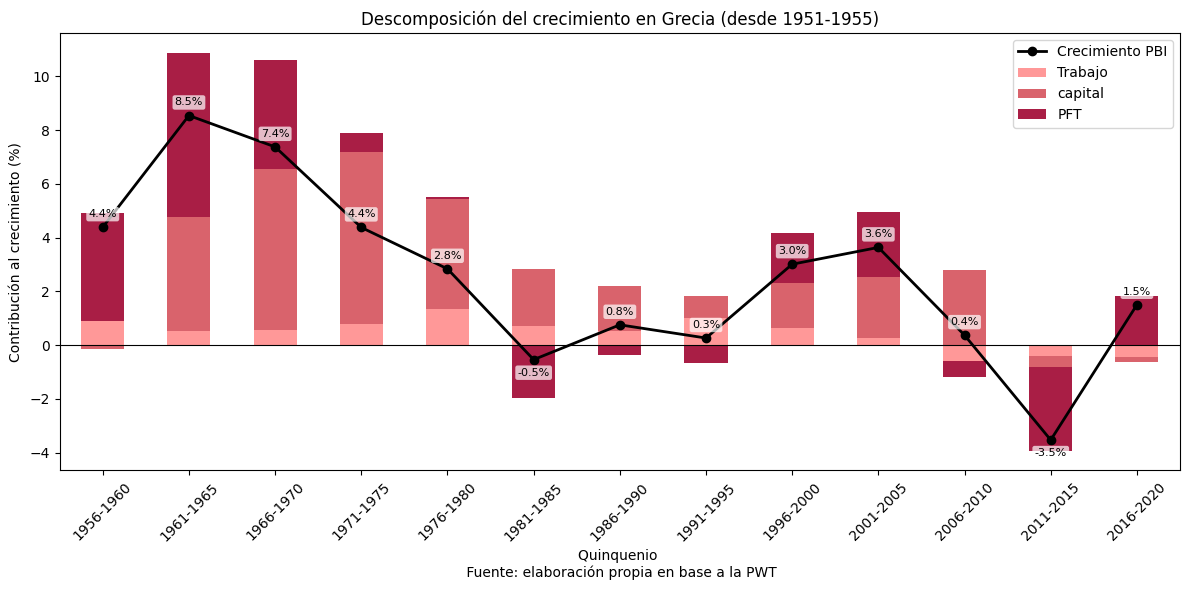

In [ ]:
# Gráfico de evolución del crecimiento
fig, ax = plt.subplots(figsize=(12,6))

# Colores, modificar segun necesario
colors = {
    "n": "#FF9898FF",                          # trabajo
    "Tasa de crecimiento de kt": "#D9636CFF",  # capital
    "PTF": "#A91E45FF"            # TFP
}

# Filtrar desde el quinquenio 1951-1955 en adelante
cuadro_filtrado = cuadro[cuadro.index.get_level_values(1) > "1951-1955"]

# Usar solo el segundo nivel (quinquenio) como índice
cuadro_filtrado = cuadro_filtrado.set_index(cuadro_filtrado.index.get_level_values(1))

# Barras apiladas
cuadro_filtrado[["n", "Tasa de crecimiento de kt", "PTF"]].plot(
    kind="bar",
    stacked=True,
    color=[colors["n"], colors["Tasa de crecimiento de kt"], colors["PTF"]],
    ax=ax
)

# Línea del PIB total (sobre el mismo eje)
ax.plot(
    range(len(cuadro_filtrado.index)),
    cuadro_filtrado["Tasa de crecimiento de yt"],
    color="black",
    marker="o",
    linestyle="-",
    linewidth=2,
    label="Crecimiento PIB"
)

yt_vals = cuadro_filtrado["Tasa de crecimiento de yt"].values
for i, yt_val in enumerate(yt_vals):
    off = 0.3 if yt_val >= 0 else -0.3
    txt = ax.text(
        i, yt_val + off, f"{yt_val:.1f}%",
        ha="center", va="bottom" if off > 0 else "top",
        color="black", fontsize=8,
        bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="none", alpha=0.7),
        clip_on=False
    )

# Para agregar texto con los % dentro de cada barra (descomentar en caso de ser necesario)
#for i, quin in enumerate(cuadro_filtrado.index):
    #bottom = 0
    #for col in ["n", "Tasa de crecimiento de kt", "PTF"]:
        #value = cuadro_filtrado.loc[quin, col]
        #if abs(value) >= 0.10:  # evita números muy chicos
            #ax.text(i, bottom + value/2, f"{value:.1f}%", ha="center", va="center", color="white", fontsize=9)
        #bottom += value

# Títulos y ejes
ax.set_ylabel("Contribución al crecimiento (%)")
ax.set_xlabel("Quinquenio \n Fuente: elaboración propia en base a la PWT")
ax.set_title(f"Descomposición del crecimiento en Grecia (desde 1951-1955)")
# Si bien esto nos sirve para no mezclar el país real con los testeos, modificar para escribir el nombre en español


plt.xticks(range(len(cuadro_filtrado.index)), cuadro_filtrado.index.get_level_values(0), rotation=45)
plt.tight_layout()

# Mostrar solo quinquenio en eje X (sin país)
plt.xticks(range(len(cuadro_filtrado.index)),
           cuadro_filtrado.index.get_level_values(0),
           rotation=45)

# Leyenda de referencias
ax.legend(["Crecimiento PBI", "Trabajo", "capital", "PFT"], loc="best")

ax.axhline(0, color="black", linewidth=0.8, label=' ')

plt.xticks(range(len(cuadro_filtrado.index)), cuadro_filtrado.index, rotation=45)
plt.tight_layout()
plt.show()